# Scipyのstatsの使い方
https://docs.scipy.org/doc/scipy/reference/stats.html

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

#### 二項分布
成功確率$p=0.5$の硬貨を3回投げるときの確率分布を求める。

In [2]:
n = 3
k = np.arange(0,n+1) #各成功回数
pmf = stats.binom.pmf(k, n, p=0.5)
pmf

array([0.125, 0.375, 0.375, 0.125])

サイコロを8回振るとき，2以下の目の出た回数を$X$とするとき，$P(X \ge 3)$の値を求める。

In [3]:
n = 8
k = np.arange(0,n+1) #各成功回数
prob = stats.binom.pmf(k, n, p=2/6)
print(prob)
sol =  1-(prob[0]+prob[1]+prob[2])
print(sol)

[3.90184423e-02 1.56073769e-01 2.73129096e-01 2.73129096e-01
 1.70705685e-01 6.82822740e-02 1.70705685e-02 2.43865264e-03
 1.52415790e-04]
0.531778692272519


#### ポアソン分布
ある都市の交通事故は1日平均2.4件ある。1日に起こる交通事故の件数がポアソン分布に従うと仮定したとき，1日の交通事故が2件以下になる確率を求める。

In [4]:
lamda = 2.4
k = np.arange(0,3)
prob = stats.poisson.pmf(k, lamda)
print(prob)
print(prob.sum())

[0.09071795 0.21772309 0.26126771]
0.5697087466575105


あるお店の1時間当たり平均2.5人の来客がある。来客がポアソン分布に従うとしたとき，2時間の間に来店する客が2人以下である確率を求める。

In [5]:
lamda_t = 2.5*2
k = np.arange(0,3)
prob = stats.poisson.pmf(k, lamda_t)
print(prob.sum())

0.12465201948308113


確率分布は離散確率であるから確率質量関数（pmf）となる。ポアソン分布の例を示す。

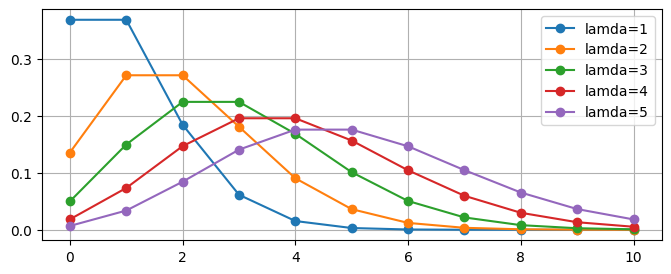

In [6]:
fig, ax = plt.subplots(figsize=(8,3))

x = np.arange(0, 11, 1)
for lam in range(1, 6):
    pmf = stats.poisson.pmf(x, lam)
    plt.plot(x, pmf, marker='o', label='lamda='+str(lam))

plt.legend()
plt.grid()

#plt.savefig('fig_NC_Prob_Poisson.png')
plt.show()

### 正規分布
$$   
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}  \exp\left\{ - \frac{ (x-\mu)^2 }{ 2 \sigma^2} \right\}
$$
scipy.stats.norm https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html<br>
左図：pdfと多数生成した確率変数のヒストグラム，　右図：pdfとcdfのプロット，ある$x$でのcdfの値は確率を意味する。これは，$[-\infty, x]$のpdfの面積と等しい。


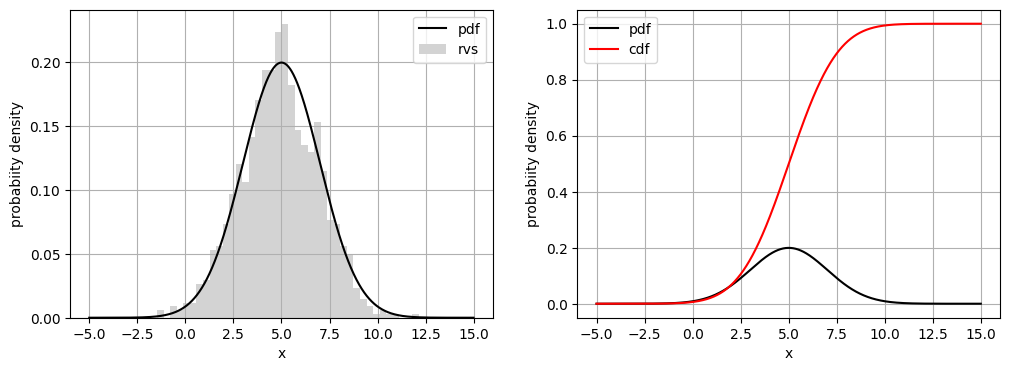

In [7]:
np.random.seed(123)

m = 5   # mean
std = 2 # standard deviation
x = np.arange( -5, 15, 0.01)
rvs = stats.norm.rvs(loc=m, scale=std, size=1000)
pdf = stats.norm.pdf(x, loc=m, scale=std)
cdf = stats.norm.cdf(x, loc=m, scale=std)

fig, ax = plt.subplots(ncols=2, figsize=(12,4))
ax[0].plot(x, pdf, color='k', label='pdf')
ax[0].hist(rvs, bins=40, density=True, label='rvs', color='lightgray')
ax[0].set_xlabel('x')
ax[0].set_ylabel('probabiity density')
ax[0].legend()
ax[0].grid()

ax[1].plot(x, pdf, color='k', label='pdf')
ax[1].plot(x, cdf, color='r', label='cdf')
ax[1].set_xlabel('x')
ax[1].set_ylabel('probabiity density')
ax[1].legend()
ax[1].grid()

#plt.savefig('fig_NC_Prob_Normal.png', bbox_inches='tight')
plt.show()

メソッドintervalは，指定した確率（alpha）に対応する値の範囲[lower, upper]を返す

In [9]:
# lower, upper = stats.norm.interval(alpha=0.95, loc=0, scale=1)
lower, upper = stats.norm.interval(confidence=0.95, loc=0, scale=1)
print(lower, upper)

-1.959963984540054 1.959963984540054


上記のalpha (**confidence**) と[lower, upper]の検証を行う。このため，上記のcdfを用いる。<br>
upperの点のcdf値は,[$-\infty$, upper]のpdfの面積，すなわち確率を表す。<br>
lopwerに関しても同様である。よって，下記のようにpa$-$pabは上記のalpha (**confidence**) を表す。
すなわち，下記の計算は上記の逆を行っている。